# Loading Packages and Dataset 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,plot_confusion_matrix,ConfusionMatrixDisplay
import joblib


c:\Users\parth\anaconda3\envs\MachineLearningProjects\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
dataset=pd.read_csv(r'Churn_Modelling.csv')
data=dataset.copy()


# EDA

In [6]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
data.shape

(10000, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
# dropping irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [11]:
data.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
data.tail(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [13]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

## Data Visualization 

<AxesSubplot:xlabel='count', ylabel='Exited'>

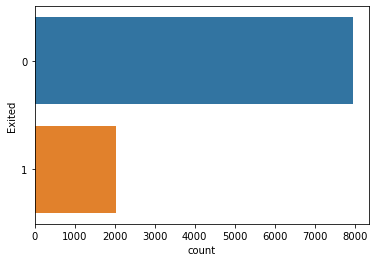

In [14]:
sns.countplot(y=data.Exited)

## Balancing dataset

<AxesSubplot:ylabel='Exited'>

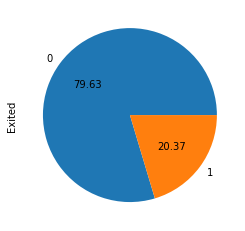

In [15]:
data.Exited.value_counts().plot.pie(autopct='%.2f')

In [16]:
X=data.drop('Exited',axis=1)
Y=data['Exited']

In [17]:
print(f'X Shape:{X.shape}')
print(f'Y Shape:{Y.shape}')

X Shape:(10000, 10)
Y Shape:(10000,)


In [18]:

ros=RandomOverSampler(sampling_strategy='not majority')
X_ros,Y_ros=ros.fit_resample(X,Y)

print(f'X resampled shape: {X_ros.shape}')
print(f'Y resampled shape: {Y_ros.shape}')

X resampled shape: (15926, 10)
Y resampled shape: (15926,)


<AxesSubplot:ylabel='Exited'>

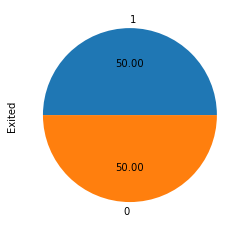

In [19]:
Y_ros.value_counts().plot.pie(autopct='%.2f')

In [20]:
X_ros.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [21]:
low_cardinality_features=[col for col in X_ros.columns if X_ros[col].nunique()<15]
high_cardinality_features=[col for col in X_ros.columns if X_ros[col].nunique()>=15]

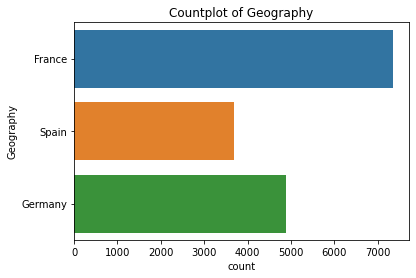

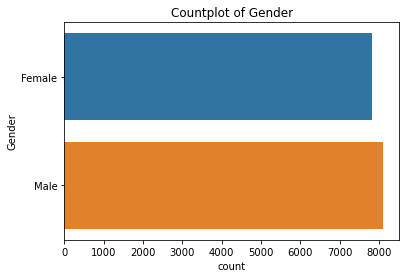

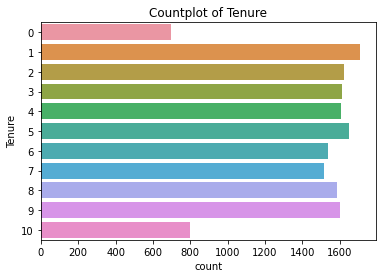

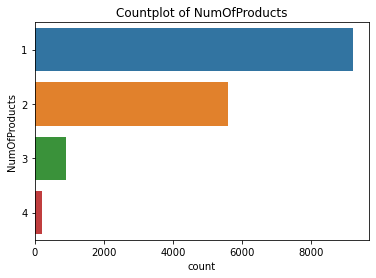

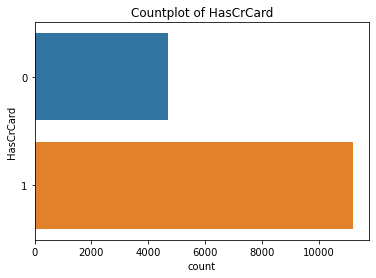

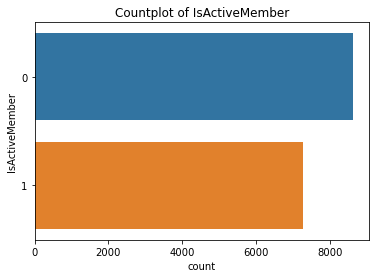

In [22]:
for feature in low_cardinality_features:
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    sns.countplot(y=X_ros[feature])
    plt.show()

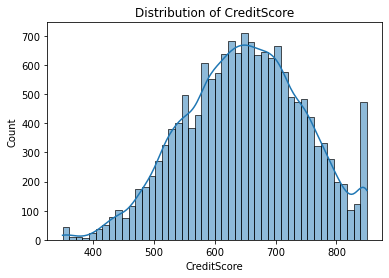

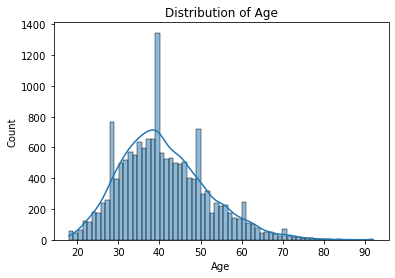

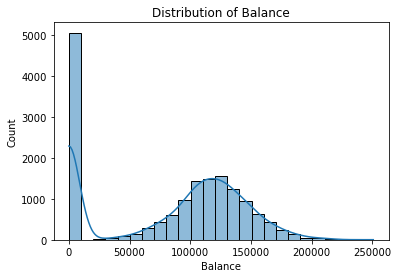

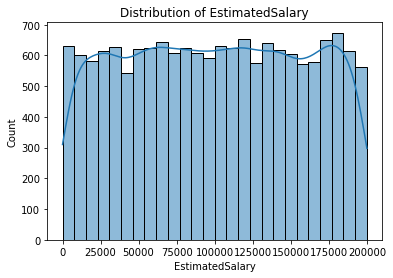

In [23]:
for feature in high_cardinality_features:
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    sns.histplot(x=X_ros[feature],kde=True)
    plt.show()

In [24]:
X_ros.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

In [25]:
X_ros.Geography.value_counts()

France     7347
Germany    4893
Spain      3686
Name: Geography, dtype: int64

In [26]:
X_ros.Gender.value_counts()

Male      8105
Female    7821
Name: Gender, dtype: int64

In [27]:
train_X,test_X,train_y,test_y=train_test_split(X_ros,Y_ros,random_state=0,test_size=0.2)

In [28]:
num_cols=[col for col in train_X.columns if train_X[col].dtypes!='object']
cat_cols=[col for col in train_X.columns if train_X[col].dtypes=='object']

In [29]:
num_preprocessor=Pipeline(steps=[
    ('scale',StandardScaler())
])

obj_preprocessor=Pipeline(steps=[
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(transformers=[
    ('num',num_preprocessor,num_cols),
    ('obj',obj_preprocessor,cat_cols)
])

In [30]:

rfc_model=RandomForestClassifier(n_estimators=200,max_depth=12,random_state=0)

rfc_pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',rfc_model)
])


In [31]:
rfc_pipe.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('obj',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('model',
                 RandomForestCla

In [32]:
rfc_pred=rfc_pipe.predict(test_X)
print(f'Accuracy of RFC Model: {accuracy_score(rfc_pred,test_y)}')
print(f'F1 Score of RFC Model: {f1_score(rfc_pred,test_y)}')
rfc_conf=confusion_matrix(rfc_pred,test_y)
rfc_conf


Accuracy of RFC Model: 0.8957940991839297
F1 Score of RFC Model: 0.8988421694088969


array([[1379,  121],
       [ 211, 1475]], dtype=int64)

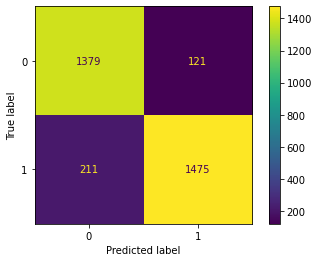

In [33]:
rfc_disp=ConfusionMatrixDisplay(confusion_matrix=rfc_conf,display_labels=rfc_pipe.classes_)
rfc_disp.plot()
plt.show()

In [34]:
xgb_model=XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2,
              max_delta_step=0, max_depth=12, min_child_weight=4,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb_pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',xgb_model)
])

In [35]:
xgb_pipe.fit(train_X,train_y)

c:\Users\parth\anaconda3\envs\MachineLearningProjects\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:05:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('obj',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('model',
                 XGBClassifier

In [36]:
xgb_pred=xgb_pipe.predict(test_X)
print(f'Accuracy of XGB Model: {accuracy_score(xgb_pred,test_y)}')
print(f'F1 Score of XGB Model: {f1_score(xgb_pred,test_y)}')
xgb_conf=confusion_matrix(xgb_pred,test_y)
xgb_conf 


Accuracy of XGB Model: 0.9337727558066541
F1 Score of XGB Model: 0.9365031597953656


array([[1419,   40],
       [ 171, 1556]], dtype=int64)

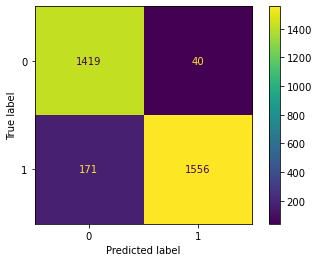

In [37]:
xgb_disp=ConfusionMatrixDisplay(confusion_matrix=xgb_conf,display_labels=xgb_pipe.classes_)
xgb_disp.plot()
plt.show()

In [38]:
lgb_model=LGBMClassifier(n_estimators=300,boosting='dart',num_leaves=80,max_depth=50,min_data_in_leaf=4,
                            num_threads=4,learning_rate=.2 ,random_state=0)


lgb_pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',lgb_model)
])

In [39]:
lgb_pipe.fit(train_X,train_y)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('obj',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('model',
                 LGBMClassifie

In [40]:
lgb_pred=lgb_pipe.predict(test_X)
print(f'Accuracy of LGB Model: {accuracy_score(lgb_pred,test_y)}')  
print(f'F1 Score of LGB Model: {f1_score(lgb_pred,test_y)}')
lgb_conf=confusion_matrix(lgb_pred,test_y)
lgb_conf 


Accuracy of LGB Model: 0.9325172630257376
F1 Score of LGB Model: 0.9353772167117523


array([[1415,   40],
       [ 175, 1556]], dtype=int64)

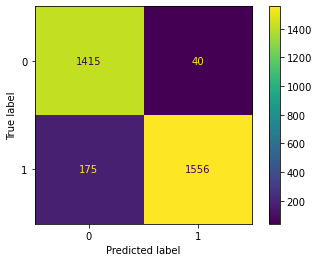

In [41]:
lgb_disp=ConfusionMatrixDisplay(confusion_matrix=lgb_conf,display_labels=lgb_pipe.classes_)
lgb_disp.plot()
plt.show()

<AxesSubplot:xlabel='count', ylabel='Exited'>

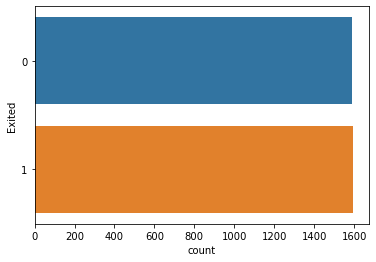

In [42]:
sns.countplot(y=test_y)

<AxesSubplot:xlabel='count'>

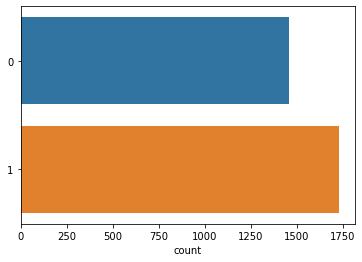

In [45]:
sns.countplot(y=lgb_pred)